In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

c:\Users\nthaku3\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\nthaku3\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\nthaku3\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Crime_df = pd.read_csv("./Data/All_Parameter_CSV.csv", index_col=0).sort_values(by='NAME10').drop_duplicates('NAME10').reset_index(drop=True)
svi_2020 = pd.read_csv('Data/svi_2020.csv', index_col=0).sort_values(by='NAME10')

In [3]:
Crime_df.drop(['Socioeconomic\xa0Status', 'Household Composition & Disability', 'Minority Status & Language',
       'Housing Type & Transportation', 'Diabetes'], axis=1, inplace=True)

In [4]:
Crime_df = Crime_df.merge(right=svi_2020, left_on='NAME10', right_on='NAME10', how='inner')

In [5]:
Crime_df.head(5)

,TRACTCE10,GEOID10,NAME10,NAMELSAD10,Long,Lat,State,County,Smoking,Binge Drinking,...,Socioeconomic Status,Household Characteristics,Racial & Ethnic Minority Status,Housing Type & Transportation,Crime,EP_AFAM,EP_HISP,EP_ASIAN,EP_AIAN,SVI
0,10100,17031010100,101.00,Census Tract 101,-87.669844,42.021262,ILLINOIS,Cook,16.4,13.8,...,0.7721,0.5522,0.7028,0.9275,13132,35.0,15.2,2.0,0.0,0.8544
1,10201,17031010200,102.01,Census Tract 102.01,-87.680149,42.016008,ILLINOIS,Cook,20.5,13.9,...,0.7859,0.7549,0.7832,0.9966,10777,33.7,23.4,5.4,0.1,0.9681
2,10202,17031010200,102.02,Census Tract 102.02,-87.673322,42.016050,ILLINOIS,Cook,19.1,13.4,...,0.9211,0.6130,0.7866,0.9991,12830,32.5,26.3,6.3,0.0,0.9911
3,10300,17031010300,103.00,Census Tract 103,-87.666535,42.015941,ILLINOIS,Cook,14.5,14.2,...,0.7681,0.2998,0.6767,0.9757,10431,29.2,15.0,2.4,0.1,0.8400
4,10400,17031010400,104.00,Census Tract 104,-87.657167,42.005440,ILLINOIS,Cook,11.9,16.6,...,0.6916,0.1262,0.5161,0.9721,7052,18.6,7.9,4.4,0.0,0.7110


In [6]:
rearranged_columns = ['TRACTCE10',
                      'GEOID10',
                      'NAME10',
                      'NAMELSAD10',
                      'Long',
                      'Lat',
                      'State',
                      'County',
                      'Smoking',
                      'Binge Drinking',
                      'Physical Inactivity',
                      'Sleep<7hours',
                      'Opioid Overdose',
                      'High Cholesterol',
                      'Obesity',
                      'High Blood Pressure',
                      'Depression',
                      'Kidney Diseases',
                      'Land Surface Temperature',
                      'Air Temperature',
                      'Direct Normal Irradiation',
                      'Wind Speed',
                      'Precipitation',
                      'Socioeconomic Status',
                      'Household Characteristics',
                      'Racial & Ethnic Minority Status',
                      'Housing Type & Transportation',
                      'Aerosol ',
                      'Nitrogen Dioxide ',
                      'Carbon Monoxide ',
                      'Sulfur Dioxide ',
                      'Formaldehyde ',
                      'Ozone ',
                      'Crime']

In [7]:
Crime_df = Crime_df.rename(columns={"Solar_DNI":"Direct Normal Irradiation"})

In [8]:
Crime_df_all_params = Crime_df[rearranged_columns]

In [9]:
Crime_df_all_params.head(5)

,TRACTCE10,GEOID10,NAME10,NAMELSAD10,Long,Lat,State,County,Smoking,Binge Drinking,...,Household Characteristics,Racial & Ethnic Minority Status,Housing Type & Transportation,Aerosol,Nitrogen Dioxide,Carbon Monoxide,Sulfur Dioxide,Formaldehyde,Ozone,Crime
0,10100,17031010100,101.00,Census Tract 101,-87.669844,42.021262,ILLINOIS,Cook,16.4,13.8,...,0.5522,0.7028,0.9275,-0.520000,0.000152,0.034224,0.000291,0.000101,0.145337,13132
1,10201,17031010200,102.01,Census Tract 102.01,-87.680149,42.016008,ILLINOIS,Cook,20.5,13.9,...,0.7549,0.7832,0.9966,-0.511506,0.000153,0.034112,0.000288,0.000101,0.145342,10777
2,10202,17031010200,102.02,Census Tract 102.02,-87.673322,42.016050,ILLINOIS,Cook,19.1,13.4,...,0.6130,0.7866,0.9991,-0.511506,0.000153,0.034112,0.000288,0.000101,0.145342,12830
3,10300,17031010300,103.00,Census Tract 103,-87.666535,42.015941,ILLINOIS,Cook,14.5,14.2,...,0.2998,0.6767,0.9757,-0.525253,0.000152,0.034224,0.000291,0.000100,0.145337,10431
4,10400,17031010400,104.00,Census Tract 104,-87.657167,42.005440,ILLINOIS,Cook,11.9,16.6,...,0.1262,0.5161,0.9721,-0.526170,0.000153,0.034353,0.000307,0.000099,0.145281,7052


In [10]:
Crime_df_all_params_scaled = Crime_df_all_params.copy()

In [11]:
Crime_df_all_params_scaled = Crime_df_all_params_scaled.iloc[:,8:]

In [12]:
Crime_df_all_params_scaled[Crime_df_all_params_scaled.columns] = StandardScaler().fit_transform(Crime_df_all_params_scaled)
Crime_df_all_params_scaled

,Smoking,Binge Drinking,Physical Inactivity,Sleep<7hours,Opioid Overdose,High Cholesterol,Obesity,High Blood Pressure,Depression,Kidney Diseases,...,Household Characteristics,Racial & Ethnic Minority Status,Housing Type & Transportation,Aerosol,Nitrogen Dioxide,Carbon Monoxide,Sulfur Dioxide,Formaldehyde,Ozone,Crime
0,0.128526,-0.046929,-0.120696,0.203114,0.191896,-0.188587,0.205221,-0.000614,0.556201,-0.244764,...,0.163662,-0.232717,1.319260,-1.855826,-2.059274,1.235995,0.119928,-0.417650,2.730279,0.897249
1,0.829724,-0.018172,0.364934,0.389041,-0.277969,-0.188587,0.423805,-0.019059,1.147530,-0.162867,...,0.774045,0.147481,1.592561,-1.666894,-1.968302,0.236956,0.063031,-0.485863,2.757458,0.480684
2,0.590291,-0.161958,0.445872,0.172126,0.460359,0.615686,0.278082,0.303726,0.640677,0.246616,...,0.346747,0.163559,1.602449,-1.666894,-1.968302,0.236956,0.063031,-0.485863,2.757458,0.843829
3,-0.196420,0.068100,-0.255593,-0.323678,-0.262529,0.473755,-0.316954,0.008608,-0.204078,-0.162867,...,-0.596379,-0.356140,1.509898,-1.972668,-2.026561,1.234211,0.121048,-0.693655,2.730279,0.419482
4,-0.641082,0.758273,-0.795181,-0.633556,-0.329424,-1.560581,-0.960564,-1.042749,2.330187,-0.981834,...,-1.119134,-1.115591,1.495660,-1.993064,-1.889973,2.385783,0.438072,-0.890802,2.425869,-0.178213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2.522862,0.729516,0.769625,1.349662,-0.392326,-1.111135,0.994554,0.248392,-0.204078,-0.244764,...,-1.284452,0.533827,1.108055,1.634308,1.416553,0.459956,-0.045508,-0.890802,-0.368179,-0.193425
792,0.008809,-0.852131,-0.039757,0.822870,0.226433,-0.070311,0.642390,0.654179,-0.879882,0.164719,...,0.477134,0.789184,0.025530,-0.677263,-0.062065,-0.048484,1.770100,0.569858,-0.786743,0.271429
793,-0.658185,1.074602,-0.930079,-0.912446,-0.306105,-0.543413,-0.899846,-0.904412,0.556201,-0.899937,...,-0.677081,-0.955756,-0.599780,0.337947,0.056407,-0.406176,-1.570174,-0.166288,0.648332,-0.392421
794,0.846827,-0.478287,0.607749,0.652437,0.224285,0.402790,0.545241,0.515842,0.640677,0.410409,...,1.020968,0.289819,-1.960352,0.160983,0.722274,-0.403500,0.530423,-0.271959,-0.895461,0.172020


In [44]:
len(Crime_df_all_params_scaled.columns)

26

In [15]:
# Importing Modules
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(Crime_df_all_params_scaled)

AgglomerativeClustering(n_clusters=3)

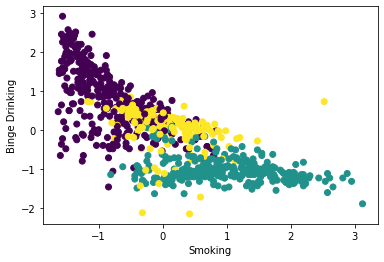

In [16]:
plt.scatter(Crime_df_all_params_scaled['Smoking'], Crime_df_all_params_scaled['Binge Drinking'], c=clustering.labels_)
plt.xlabel('Smoking')
plt.ylabel('Binge Drinking')
plt.show()

In [49]:
from sklearn.decomposition import PCA

# Perform PCA with all components
pca = PCA(n_components=26, random_state=42)
pca.fit(Crime_df_all_params_scaled)
X_pca = pca.transform(Crime_df_all_params_scaled)

print("Explained variance ratio: ", sum(pca.explained_variance_ratio_ * 100))



Explained variance ratio:  97.74834700802461


Text(0, 0.5, 'Explained variance')

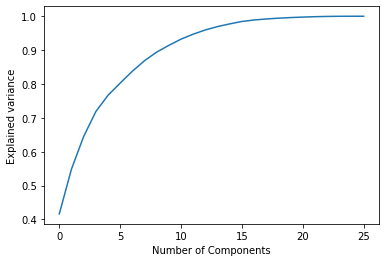

In [46]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained variance")

#from the below plot we can see that the first 15 components explain about 98% of variance in data

In [52]:
#perform PCA with just 2 components
pca_2 = PCA(n_components=2, random_state=42)
pca_2.fit(Crime_df_all_params_scaled)
X_pca = pca_2.transform(Crime_df_all_params_scaled)

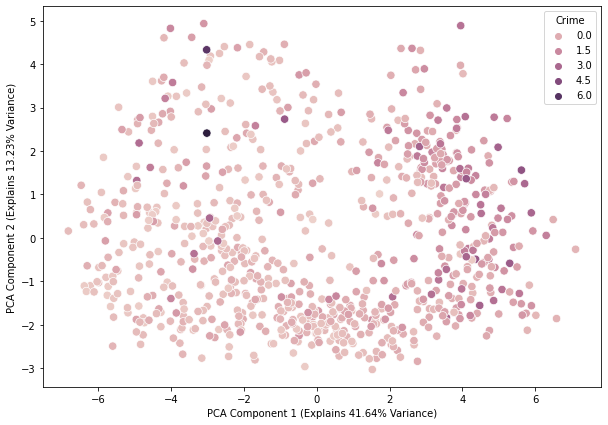

In [62]:
import seaborn as sns

# Get the explained variance ratio for each component
variance_ratio = pca_2.explained_variance_ratio_

# Plot the first two components and color by cluster labels
plt.figure(figsize=(10,7))
sns.scatterplot(x= X_pca[:,0],y= X_pca[:,1], s=70, hue='Crime', data=Crime_df_all_params_scaled, c=clustering.labels_)
plt.xlabel(f'PCA Component 1 (Explains {variance_ratio[0]*100:.2f}% Variance)')
plt.ylabel(f'PCA Component 2 (Explains {variance_ratio[1]*100:.2f}% Variance)')
plt.show()

In [66]:
#listing component names 

pc_names = ["PC"+str(i+1) for i in range(len(pca_2.components_))]
column_names = Crime_df_all_params_scaled.columns.tolist()

pc_col_names = dict(zip(pc_names, pca_2.components_))
for name, col_names in pc_col_names.items():
    sorted_col_names = sorted(zip(col_names, column_names), reverse=True)
    print(f"{name}: {[col[1] for col in sorted_col_names]}")

PC1: ['Obesity', 'Physical Inactivity', 'Sleep<7hours', 'Kidney Diseases', 'High Blood Pressure', 'Smoking', 'Racial & Ethnic Minority Status', 'Socioeconomic Status', 'Household Characteristics', 'Precipitation', 'High Cholesterol', 'Air Temperature', 'Opioid Overdose', 'Crime', 'Sulfur Dioxide ', 'Direct Normal Irradiation', 'Nitrogen Dioxide ', 'Land Surface Temperature', 'Aerosol ', 'Carbon Monoxide ', 'Housing Type & Transportation', 'Depression', 'Formaldehyde ', 'Ozone ', 'Wind Speed', 'Binge Drinking']
PC2: ['Carbon Monoxide ', 'Sulfur Dioxide ', 'High Blood Pressure', 'Housing Type & Transportation', 'High Cholesterol', 'Crime', 'Kidney Diseases', 'Sleep<7hours', 'Obesity', 'Physical Inactivity', 'Racial & Ethnic Minority Status', 'Formaldehyde ', 'Household Characteristics', 'Ozone ', 'Socioeconomic Status', 'Smoking', 'Opioid Overdose', 'Air Temperature', 'Wind Speed', 'Binge Drinking', 'Depression', 'Precipitation', 'Nitrogen Dioxide ', 'Land Surface Temperature', 'Direct N

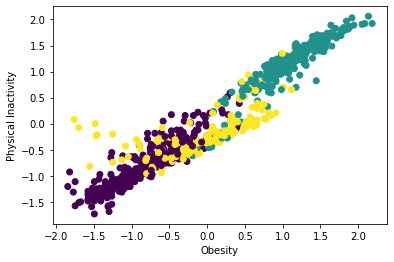

In [68]:
plt.scatter(Crime_df_all_params_scaled['Obesity'], Crime_df_all_params_scaled['Physical Inactivity'], c=clustering.labels_)
plt.xlabel('Obesity')
plt.ylabel('Physical Inactivity')
plt.show()

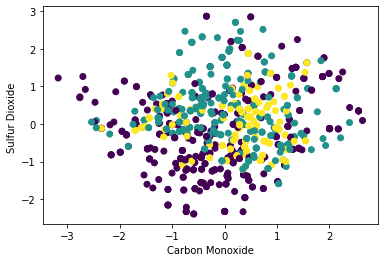

In [71]:
plt.scatter(Crime_df_all_params_scaled['Carbon Monoxide '], Crime_df_all_params_scaled['Sulfur Dioxide '], c=clustering.labels_)
plt.xlabel('Carbon Monoxide')
plt.ylabel('Sulfur Dioxide ')
plt.show()